**PySDS Week 4 Lecture 1. V.1**
Last author: B. Hogan

In [189]:
%matplotlib inline

# Plotting information 

Plotting is a means of expressing your data in a form that makes it more intelligible to the viewer than in a different form (regardless of whether that viewer is you or another person). Visualization is a regular part of data science, and used far more heavily in the lab than in scientific reports. That is to say, if you've only read research but not been a part of it, you might be underestimating how much visualization is used. 

In a journal you'll see the handful of nice graphics that they produced. In the lab, you might be producing charts routinely. When I am focused on data analysis for a paper, I'll do dozens of charts. They may be simple distributions, but they help. Sometimes they can be overly complex and don't work well. These charts vary in their coherence, clarity and utility. Some were junk and some were really interesting. Some needed polish and some were near publication ready from the get go. Regardless of the audience and the focus, these graphics all share a similar function: _To represent data in a scale that changes the perception of that data and ideally the phenomenon that it represents_. 

Below we briefly review some elementary concepts from the study of Visualization and then I introduce some packages for use. We will show these packages briefly and leave it to you to continue on working with them.

__“The purpose of visualization is insight, not pictures.”__ -- Ben Shneiderman

# Section 1. Frameworks for understanding information visualization

## Framework 1. DIKW: Data, Information, Knowledge, Wisdom

An often repeated framework in information visualization is that there is a hierarchy from data to wisdom. 

- **Data** refers to that which was measured and encoded in some means. 
- **Information** refers to a presentaiton of that data that signals differences we would understand. 
- **Knowledge** is being able to understand the interrelatedness of the information (i.e. signals). If we can convey information in a graphic to another person we can give them knowledge. 
- **Wisdom** is challenging to define. In this domain I like Alberto Cairo's definition (from "The Functional Art"): Wisdom is "deep understanding of acquired knowledge, when we not only “get it,” but when new information blends with prior experience so completely that it makes us beter at knowing what to do in other situations, even if they are only loosely related to the information from which our original knowledge came. Just as not all the information we absorb leads to knowledge, not all of the knowledge we acquire leads to wisdom" (P. 17). 

We are trying to turn data into knowledge by identifying information (statistically or otherwise) that we can convey to an audience. We make the researchers wise as they understand how this knowledge relates to their existing frame of reference and possible future phenomena. 

## Framework 2. Tufte's principles

There are a variety of frameworks for thinking about visualization. One of the now classic framework is Edward Tufte's principles from his seminal book, "The Visual Display of Quantitative Information". 

It is said that he has six principles, but these are really maxims. If you read through all his books, there's principles everywhere, so let's not be too slavish to the specific number. 

So to summarize some of the key points: 
- Remove extraneous and reduntant objects (principle of the data:ink ratio and the removal of "chart junk").  
- Normalize where possible to show true differences in scale (particularly for money)
- Use clear and detailed labelling that focuses on the chart. 
- Small multiples for comparison rather than more data on one chart.

Other than that, much of this is about trying not to misrepresent data, but this is not a principle, _per se_, as it is an orientation. 

## Framework 3. Bertin's notion of visual variables

One of the early basis of visualization is in Bertin's notion of visual variables. It has been expanded in late years, mainly within cartography. The basics are pretty clear. Different features of variables have different capacity to represent data. 

If we use saturation, for example, it should imply a difference of intensity, not a difference of quality. So we would not want to represent religions as shades of gray, as that would imply difference of intensity. On the other hand, presenting the percent of supporters who go to church / synagoge / temple, etc...daily or weekly, would make sense since we can describe the intensity of religiosity regardless of faith. These are for reference: 

- **Position**: The arrangement of elements has meaning. 
- **Size**: Larger items tend to mean more of something. Note: People are not good with linear scaling of diameter, making difference in area of nodes tricky. 
- **Shape**: Different shapes mean different categorical groups. 
- **Value / Brightness**: Darker tends to mean more on a light background (and vice versa).  
- **Hue**: Can be either continuous or categorical. Do not use more than two colors for quantitative differences. Use a middle white point if it makes sense. 
- **Orientation**: Objects can be rotated. 
- **Texture**: Objects can have different textures.

See more: http://wiki.gis.com/wiki/index.php/Visual_variable and https://www.axismaps.com/guide/general/visual-variables/ 

## Framework 4. The hierarchy of pre-attention

Recent neuroscience work has highlighted how the visual system processes information. Some features are processed more frequently or more rapidly than others. In particular, we would say that some features are pre-attentive and others attentive. The pre-attentive features are the one's that "pop", for example, a difference in color, where most of the dots are black but a few are red - we will wonder, what's up with the red ones? This is subconscious processing. It includes things like facial recognition. 

Pre-attentive variables are featured in Colin Ware's "Visual Thinking for Design". Here are the important ones: 
- **Movement**
- **Position**
- **Colour**
- **Form**

Depending on the style and context, different variables will be more or less noticeable. In general, colour is processed before form, so having dots of different shapes will not be as readily identifiable as different colours (see example below). Movement tends to be noticed before position. That is, if there is one moving element. Overall, however, it is best to simply be mindful of these. 

One important feature of pre-attention is that it highlights how dangerous it is to use the wrong visual varaible. Whereas in Bertin's domain we were considering **visual mapping**, in this domain we are considering the psychology of the viewer. So if you have a visual variable mapped in a confusing way, and it is a preattentive variable it will be really, really difficult for the reader to appreciate the chart as intended. 

Below is an example (and our first seaborn chart). The top part is just getting some random data ready. The bottom we have a small number of orange points and a larger number of blue points. Notice you're almost unwillingly drawn to make an inference about the orange points even though they were just a random draw like the blue points. 

(0, 10)

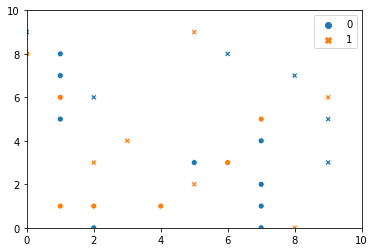

In [199]:
#################################
# Generate some data: 
#     Two arrays for x, y ranging from 1 to 10. 
#     A third array, same length, binary. 
import numpy as np 
length = 30
axis_lim = 10
prob_diff = .5

# This gets the x and y coordinates 
x,y = np.random.randint(axis_lim, size=[2,length])

# zc: The colour of the varaibles. 
zc = [str(x) for x in np.random.binomial(1, prob_diff, length)]

# zs: The shape of the variables. Can you even notice the shape difference? 
zs = [str(x) for x in np.random.binomial(1, prob_diff, length)]

#################################
# Plot the data 
import seaborn as sns 

lm = sns.scatterplot(x,y,hue=zc,style=zs)

lm.set_ylim(0,axis_lim)
lm.set_xlim(0,axis_lim)

## Framework 5. Shneiderman's principles of interactive design

These principles are realted more to what you would do with an interactive visualziation than a static one. 

- **Overview**: Present the entire collection or entire data set if possible. 
- **Zoom**: Enable the user to zoom in on an area of interest.
- **Filter**: Let the user reduce the information presented. 
- **Details on demand**: Individual pieces of information should be available for inspection.
- **Relate**: View relationships among items. 
- **History**: A user should be able to undo or replay a history of steps. 
- **Extract**: A user should be able to extract a sub-query that led to any given sub-figure. 

Not every interactive visualization will be able to present graphics in this manner. However, these are seen as an ideal set. The most important are the first four. But if you had to choose two, it's overview and zoom. Give an individual a sense of the scale and then let them re-scale as necessary. 

# Section 2. Static visualizations

In many respects, I could probably just say read the seaborn tutorials, as they are truly excellent. If fact, we are actually going to borrow from them liberally here. 

Seaborn is a wrapper on top of matplotlib that does a lot of the configuration out of the box. Matplotlib is similar to ggplot2 in that it layers the data frame by frame. Seaborn is a little more forgiving and frankly, more aesthetically appealing. 

## 2.1. How a seaborn visualization works

Seaborn visualizations expect numpy arrays as data. They can also take DataFrames, which are not as robust, but usually fine*. 

* I've had no trouble with dataframes directly, but the tutorial gives a caveat so I will too. 

As seen above, using seaborn can be as out-of-the-box as simply calling the appropriate method, with the right data. You will be presented with the defaults, but these aren't bad.

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


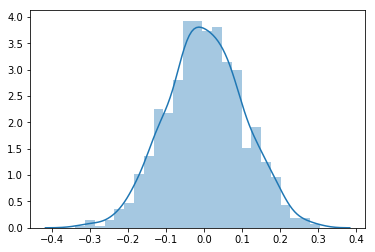

In [203]:
import seaborn as sns 
import numpy as np 

sns.distplot( np.random.normal(0,.1,1000) )

# Don't worry about the FutureWarning (it's actually contested on GitHub...)

So we can see that seaborn automatically did a couple things we never asked for:
- Added the trendline,
- Selected the colour,
- Set the x and y ranges so that we can see all the data,
- Set the size/resolution of the plot.

And it did not do a couple of things that might be useful:
- Add labels to the axis,
- Add a title,
- Add a legend.

Let's review the way to tweak each of these things. Before we go on, however, there's an important distinction to be made between the plot and the frame. 

**Trendline**: This is referred to as a "kdeplot" in seaborn for kernel density estimate. To change its state you would add ```kde=False```. You can also disable the histogram itself, with ```hist=False```. Sometimes you might want a rugplot, which plots a distribution as a series of sticks.

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'show'

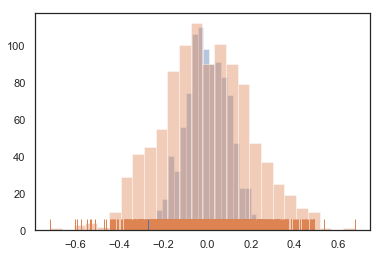

In [233]:
sns.distplot( np.random.normal(0,.1,1000), kde=False, rug=True)
sns.distplot( np.random.normal(0,.2,1000), kde=False, rug=True)

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


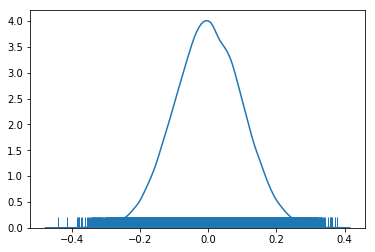

In [206]:
dist_1 = np.random.normal(0,.1,50000)
sns.distplot( dist_1, hist=False, rug=True)

### Selecting colour

There are a variety of colour palettes availble for seaborn. To be honest, I think the developer has given more care in this than we have any right to expect. The palettes range from the basic RGB towards HSul, which is a hue and saturation score that's corrected for human vision and a variety of palettes that work for bichromatic (i.e. colorblind) vision. 

I quite like what's out of the box, but I will say that in my own work I've come across a need to set the color palette before by hand. This can be done by first identifying the preferred colours, adding them to a list. 

Alternately, use the ```palette = sns.color_palette("<type>", number)``` as an argument. 

In [216]:
#########################
# 
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline 

lenn = 200
dist1 = np.concatenate([np.random.normal(0,2,lenn//2), np.random.normal(0.1,.5,lenn//2)])
dist2 = [1,2,3,4]*(lenn//4)
dist = pd.DataFrame([dist1,dist2]).T
dist.columns = ["norm","group"]

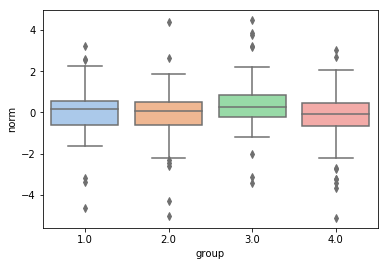

In [219]:
sns.boxplot(x=dist["group"],y=dist["norm"],palette=sns.color_palette("pastel", 4))

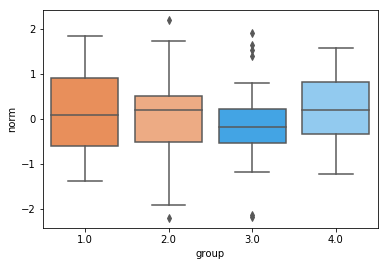

In [85]:
flatui = ["#ff8944", "#ffa672", "#28a9ff", "#82cdff"]

sns.boxplot(x=dist["group"],y=dist["norm"],palette=flatui)

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


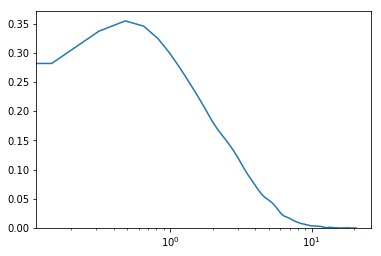

In [221]:
## Setting the axis

skewed = np.random.exponential(scale=2.1,size= 10000) 
plot = sns.distplot( skewed ,kde=True,hist=False)
plot.set_xscale("log")
# plot.set_yscale("log")

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'title_for_plot')

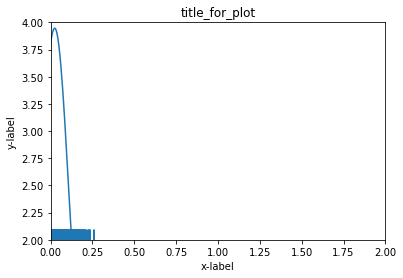

In [228]:
dist_1 = np.random.normal(0,.1,1000)
plt = sns.distplot( dist_1, hist=False, rug=True)
plt.set_xlim(0,2)
plt.set_ylim(2,4)
plt.set_xlabel("x-label")
plt.set_ylabel("y-label")
plt.set_title("title_for_plot")

C:\Users\bernie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'y-label'),
 (0, 2),
 Text(0.5,0,'x-label'),
 Text(0.5,1,'title_for_plot')]

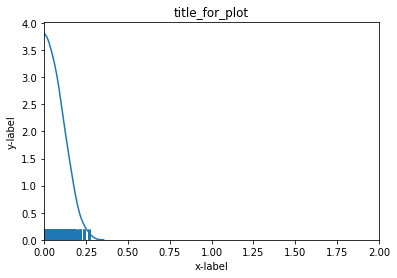

In [159]:
dist_1 = np.random.normal(0,.1,1000)
plt = sns.distplot(dist_1, hist=False, rug=True)

plt.set( xlim=(0,2),xlabel="x-label",ylabel="y-label",title= "title_for_plot")

## 2.2 A review of basic charts.

Instead of pasting them all in here, I will encourage you to look at the gallery for inspiration and then to the API section which denotes the variety of plots available. For each one there is a simple code snippet.  

- Gallery: 
    https://seaborn.pydata.org/examples/index.html
- API reference: 
    https://seaborn.pydata.org/api.html
    
On thing I would encourage viewing especially are the tutorials. There's one on Anscombe's Quartet that shows that even though we have the same statistical measures for all four distributions we can still model the unique features of each of them if we know how to do it. This helps remind us that it is important to review distributions. It's hard to correct for something if you do not know how to see it. 

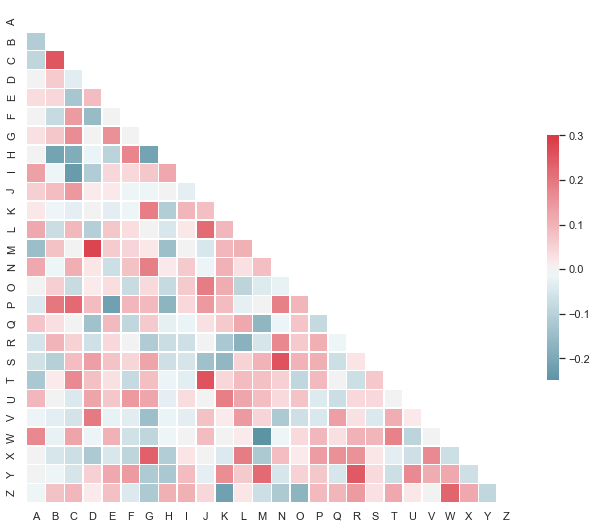

In [230]:
# %load https://seaborn.pydata.org/_downloads/many_pairwise_correlations.py
"""
Plotting a diagonal correlation matrix
======================================

_thumb: .3, .6
"""
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## 2.3 Multiple charts in the same figure 

One feature that may be challenging for a new prorgammer is to understand how to place multiple charts in the same figure. This is done through the use of "axes". Confusingly, this term does not mean the plural of axis in the sense of both x and y axes. Those per-chart are just called axis, and they tend to write single and plural as the same. Axes refer to the chart itself. An axes can be a table that by default is 1 cell by 1 cell. By denoting that multiple cells are available you can assign a plot to each cell. 

Seaborn has two ways to handle axes, the first is through a facet grid and the second is by calling the axes directly. Where possible use facets and then map them on to the plot. See: https://seaborn.pydata.org/tutorial/axis_grids.html

## Section 3. Dynamic charts 

A new movement towards dynamic charts has really taken hold. Early dynamic work tended to involve either very ugly and non-standard html elements, overbearing flash sites or java applets that felt strange as they either took too long to load or popped up a window. They also tended to crash. Since HTML5 and CSS3 we have seen an explosion of potential for interactive charts. For ```R``` there is the RShiny framework that allows the exporting of dynamic charts. For javascript, the go-to package for most visualizations is ```d3```. That being said, for network graphics, myself and others tend to prefer ```sigma.js```. For python, there is ```bokeh```. This package is great. It integrates tightly with anaconda as well as producing standalone graphics. 
- If the graphical data is __static but the view is dynamic__ (i.e. a large picture that you pan and zoom) it can run in a browser with no issue.* 
- If it is a graphic that ```dynamicly selects data``` to be displayed it has to be run from a server. That being said, the bokeh people have found very sharp ways to integrate it directly into a jupyter notebook as we shall see below. 

### First, an example of how dynamic graphics can be utterly amazing: Hans Rosling's TED demonstration: 

<iframe width="1104" height="621" src="https://www.youtube.com/embed/pJfq-o5nZQ4" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [235]:
from IPython.display import HTML

HTML('<iframe width="800" height="600" src="https://www.youtube.com/embed/hVimVzgtD6w?start=195" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

## Now see it in bokeh! 
https://demo.bokehplots.com/apps/gapminder

## Here's the source code
https://github.com/bokeh/bokeh/tree/master/examples/app/gapminder

Bokeh works very similarly to seaborn. That is to say it does a lot of the heavy lifting in the background and then you can configure to taste. 
- First, we would want to initialise ```bokeh```,
- then we want to determine whether we are sending the result to a file or to a jupyter notebook.
- We then initialise our plot
- We add some data

No surprise but bokeh is included with anaconda. Why no surprise? Because it is developed by the same people. 

In [236]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [237]:
from bokeh.plotting import figure

# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="My Line Plot")

# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(p) # show the results

Let's try that again, but instead let's output this to a file:

In [238]:
# create a new plot (with a title) using figure
from bokeh.io import output_file
output_file("example1.html")

p = figure(plot_width=400, plot_height=400, title="My Line Plot 1")

# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(p) # show the results

In the case of a bokeh plot, there wasn't any change in the data. That would require a way for the page to talk to a server that feeds it new data. Below is a simple example that shows this behavior. It uses the notion of a ```callback()``` which is a function that is called whenever there is a change in the front end. It simply listens for that change andd then renders a new graph with the appropriate changes. Below is justa  copy and paste from the bokeh tutorial: **(begin tutorial)**

## Embedding a Bokeh server in a Notebook

This notebook shows how a Bokeh server application can be embedded inside a Jupyter notebook. See: https://github.com/bokeh/bokeh/blob/1.0.0/examples/howto/server_embed/notebook_embed.ipynb for source code. 

In [239]:
import yaml

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook

from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature

output_notebook()

Loading BokehJS ...

There are various application handlers that can be used to build up Bokeh documents. For example, there is a `ScriptHandler` that uses the code from a `.py` file to produce Bokeh documents. This is the handler that is used when we run `bokeh serve app.py`. Here we are going to use the lesser-known `FunctionHandler`, that gets configured with a plain Python function to build up a document. 

Here is the function `modify_doc(doc)` that defines our app:

In [240]:
def modify_doc(doc):
    df = sea_surface_temperature.copy()
    source = ColumnDataSource(data=df)

    plot = figure(x_axis_type='datetime', y_range=(0, 25),
                  y_axis_label='Temperature (Celsius)',
                  title="Sea Surface Temperature at 43.18, -70.43")
    plot.line('time', 'temperature', source=source)

    def callback(attr, old, new):
        if new == 0:
            data = df
        else:
            data = df.rolling('{0}D'.format(new)).mean()
        source.data = ColumnDataSource(data=data).data

    slider = Slider(start=0, end=30, value=0, step=1, title="Smoothing by N Days")
    slider.on_change('value', callback)

    doc.add_root(column(slider, plot))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#DDDDDD"
                outline_line_color: white
                toolbar_location: above
                height: 500
                width: 800
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: white
    """))

Now we can display our application using ``show``, which will automatically create an ``Application`` that wraps ``modify_doc`` using ``FunctionHandler``. The end result is that the Bokeh server will call ``modify_doc`` to build new documents for every new sessions that is opened.

**Note**: If the current notebook is not displayed at the default URL, you must update the `notebook_url` parameter in the comment below to match, and pass it to `show`.

In [241]:
show(modify_doc, notebook_url="http://localhost:8889") # If the port is different, type it in here. Mine is often 8889. 

## 3.5 Further reading. 

I would strongly recommend checking out the bokeh tutorials. Not the least of which, because they are jupyter notebooks that you can run yourself in the browser or copy and run locally. 

In [192]:
# %load https://matplotlib.org/_downloads/barchart.py